# **Project 6 - EDA Notebook**
**Name:** Kayla Breum

**Date:** 2/10/2024

The purpose of this project is to demonstrate the ability to perform and publish a custom EDA, utilizing skills with Jupyter, pandas, Seaborn, and other popular tools for data analytics.

## **Import Dependencies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## **Data Acquisition**

In [2]:
# Load the dataset into a pandas DataFrame
flights = sns.load_dataset('flights')
print(flights.columns)

# Inspect first rows of the DataFrame
print(flights.head())

Index(['year', 'month', 'passengers'], dtype='object')
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


## **Initial Data Inspection**

In [3]:
print(flights.head(10))
print(flights.shape)
print(flights.dtypes)

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148
7  1949   Aug         148
8  1949   Sep         136
9  1949   Oct         119
(144, 3)
year             int64
month         category
passengers       int64
dtype: object


## **Initial Descriptive Statistics**

In [4]:
print(flights.describe())

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


## **Initial Data Distribution**

### Numerical Columns

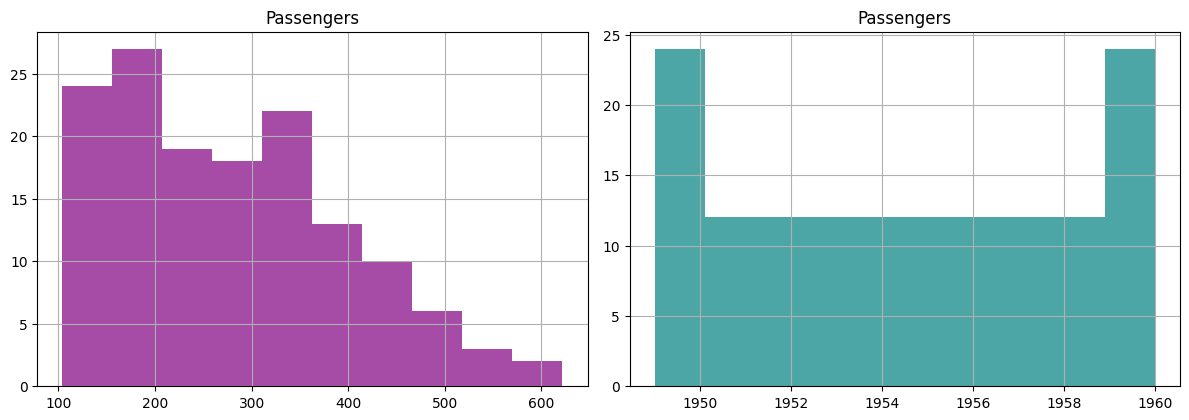

In [5]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
flights['passengers'].hist(color='purple', alpha=0.7)
plt.title('Passengers')

plt.subplot(2, 2, 2)
flights['year'].hist(color='teal', alpha=0.7)
plt.title('Passengers')

plt.tight_layout()
plt.show()

### Categorical Columns

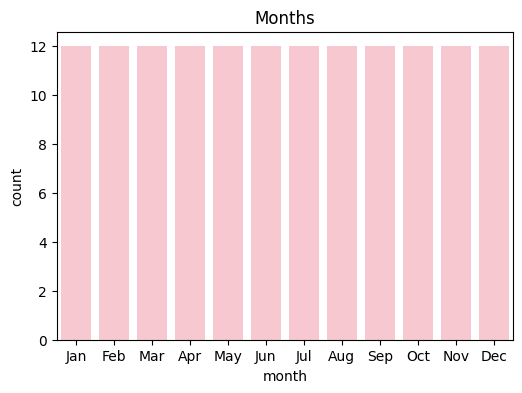

In [6]:
flights['month'].value_counts()

plt.figure(figsize=(20, 4))
colors = ['pink']
for i, col in enumerate(flights.select_dtypes(include=['object', 'category']).columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=col, data=flights, color=colors[i])
    plt.title(f'Months')

plt.show()

### Observations:
- Most flights have fewer than 350 passengers.
- There were an equal number of flights in 1949-1950 as there were in 1959-1960.
- There were an equal number of flights in 1951-1958.
- The data set looks at the each month equally.

## **Initial Data Transformation and Feature Engineering**

## **Initial Visutalizations

In [7]:
flights.rename(columns={'year': 'Year', 'month': 'Month', 'passengers': 'Number of Passengers'}, inplace=True)

In [8]:
flights['Total Passengers Each Year'] = flights.groupby('Year')['Number of Passengers'].transform('sum')

flights['Percent Change in Passengers'] = flights['Number of Passengers'].pct_change() * 100
flights['Average Passengers per Month'] = flights['Number of Passengers'].mean()
flights['Year and Month'] = flights['Year'].astype(str) + '-' + flights['Month'].astype(str)

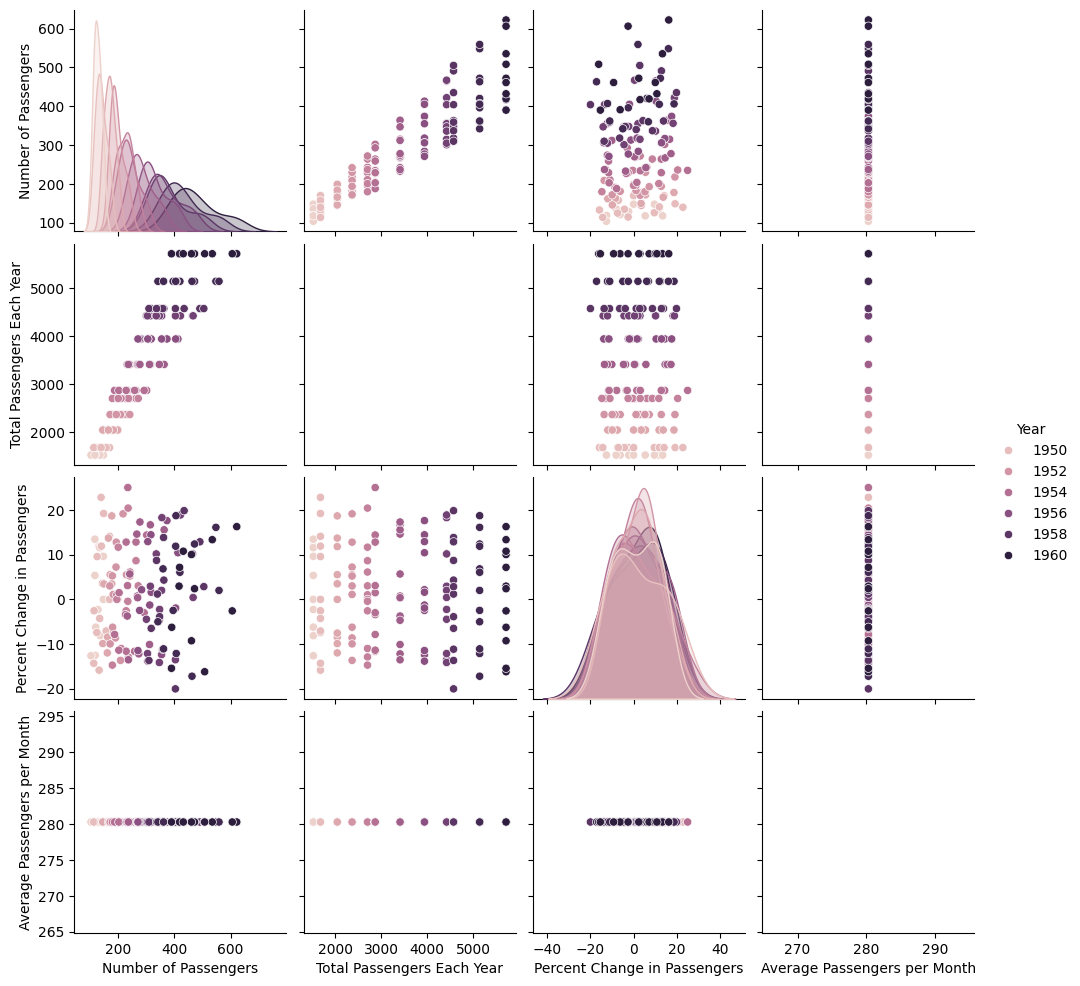

In [9]:
sns.pairplot(flights, hue='Year')
plt.show()

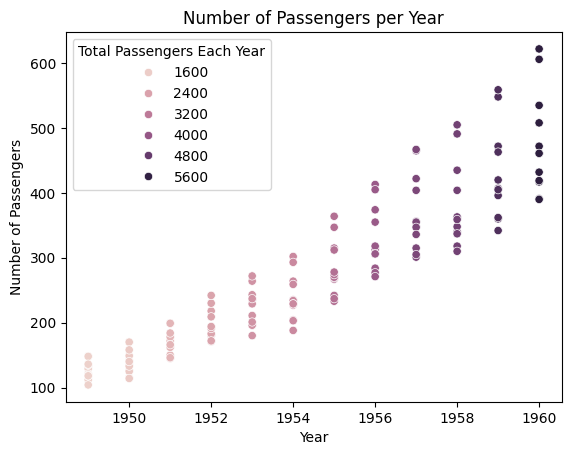

In [10]:
sns.scatterplot(x='Year', y='Number of Passengers', hue='Total Passengers Each Year', data=flights,)
plt.title('Number of Passengers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

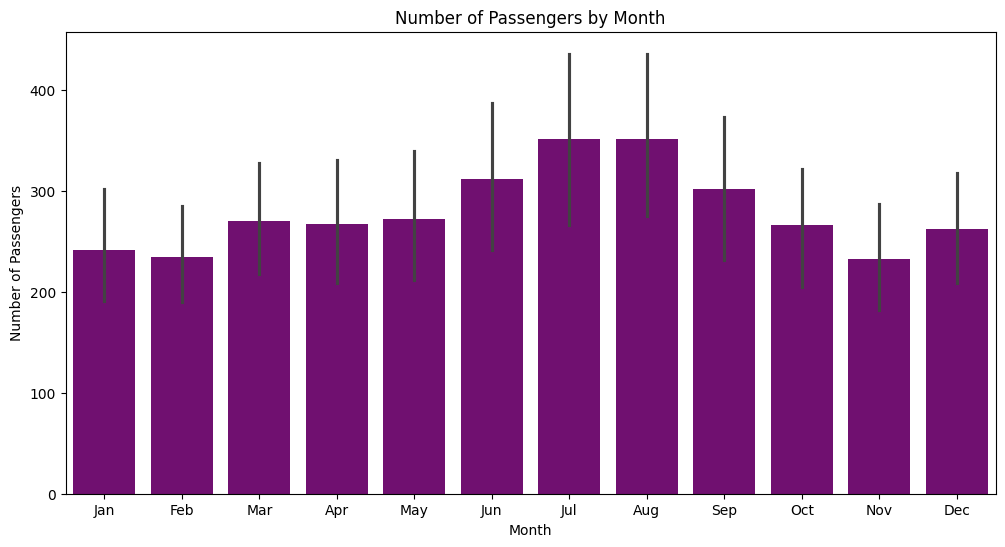

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=flights, x='Month', y='Number of Passengers', color='purple')

plt.title('Number of Passengers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')

plt.show()



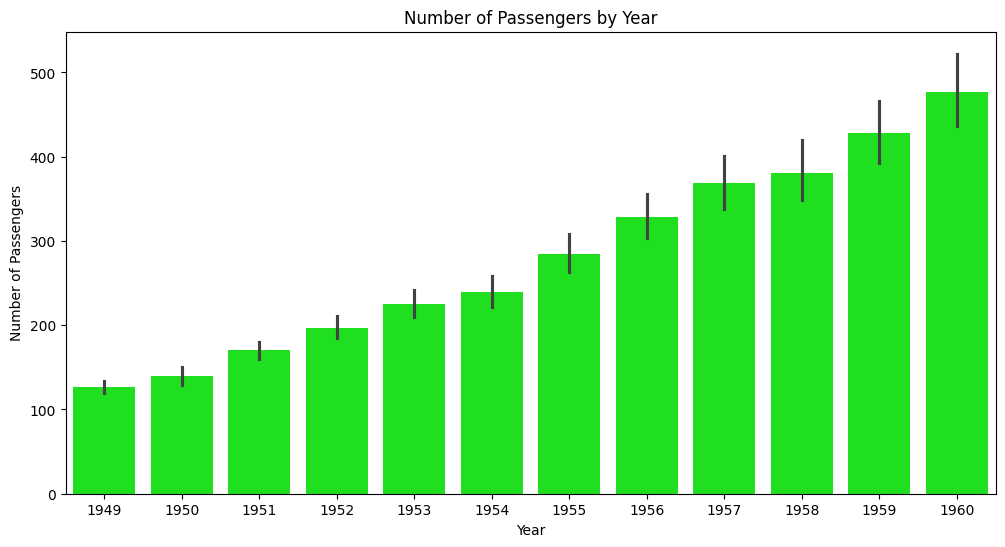

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=flights, x='Year', y='Number of Passengers', color='lime')

plt.title('Number of Passengers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

plt.show()

### Observations:
- There is an increase in total passengers each year.
- July and August were the busiest months for flying, regardless of year.
- February and November were the lease busiest months for flying, regardless of year.